# HW 3: Introduction and Setup
* Copy the contents of the file "transforms_hw03.py" to the bottom of your "transforms.py" file.
* Complete the function definitions for "se3" and "inv" 
* Run this notebook and check the outputs to make sure everything matches. If your code is correct, the output should exactly match the homogenous transformation matrices shown below. 
* Make sure to review each cell and think about what the operation means. Does it make sense? If not, ask about it on Piazza or in office hours. 

In [1]:
import transforms as tr
import transforms_symbolic as st

import numpy as np
import sympy as sm
from IPython.display import display, Math
from sympy.physics.vector.printing import vlatex

from visualization import VizScene 

np.set_printoptions(precision=3)

## Homogeneous matrix made of only rotation about z-axis by amount $\frac{\pi}{4}$

Rotation by amount theta around the z-axis should give the following:
$$
\left[\begin{matrix}0.707 & -0.707 & 0 & 0\\ 0.707 & 0.707 & 0 & 0\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{matrix}\right]
$$

In [2]:
T = tr.se3(tr.rotz(np.pi/4))
print(T)


[[ 0.707 -0.707  0.     0.   ]
 [ 0.707  0.707  0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]


## Translation only along the x-axis by an amount $0.5$ should give the following:
$$
\left[\begin{matrix}1 & 0 & 0 & 0.5 \\0 & 1 & 0 & 0\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{matrix}\right]
$$

In [3]:
T = tr.se3(p=[0.5, 0, 0])
print(T)

[[1.  0.  0.  0.5]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]]


# Checking the "inv" function

If we calculate a homogenous transform with a rotation of 45 degrees about the x-axis and a general translation ($[0.5, 0.25, 0.3]^T$) we get the following:
$$
\left[\begin{matrix}1 & 0 & 0 & 0.5\\0 & 0.707106781186548 & -0.707106781186547 & 0.25\\0 & 0.707106781186547 & 0.707106781186548 & 0.3\\0 & 0 & 0 & 1\end{matrix}\right]
$$

Then, we can multiply the original transform by its inverse to check out inverse function, we should get the following:
$$
\left[\begin{matrix}1 & 0 & 0 & 0\\0 & 1.0 & 0 & 0\\0 & 0 & 1.0 & 0\\0 & 0 & 0 & 1\end{matrix}\right]
$$

In [4]:
T = tr.se3(tr.rotx(np.pi/4), [0.5, 0.25, 0.3])
print(T)

# now we can check if we implemented "inv" correctly:
check = tr.inv(T) @ T
print("\n\n inv(T) @ T should give identity matrix:")
print(np.matrix.round(check, decimals=2)) # changed code to round the matrix


[[ 1.     0.     0.     0.5  ]
 [ 0.     0.707 -0.707  0.25 ]
 [ 0.     0.707  0.707  0.3  ]
 [ 0.     0.     0.     1.   ]]


 inv(T) @ T should give identity matrix:
[[ 1.  0.  0.  0.]
 [ 0.  1. -0.  0.]
 [ 0. -0.  1.  0.]
 [ 0.  0.  0.  1.]]


# Transform a point in one frame to another frame


## DH parameters combined for a single joint:

Remember that if we combine a rotation in z, translation in z, then translation in x, and rotation in x, we should get the same result as the book for following the DH convention to move from one frame (or joint) to another as follows: 

$$
\left[\begin{matrix}\cos{\left(\theta \right)} & - \sin{\left(\theta \right)} \cos{\left(\alpha \right)} & \sin{\left(\alpha \right)} \sin{\left(\theta \right)} & a \cos{\left(\theta \right)}\\\sin{\left(\theta \right)} & \cos{\left(\alpha \right)} \cos{\left(\theta \right)} & - \sin{\left(\alpha \right)} \cos{\left(\theta \right)} & a \sin{\left(\theta \right)}\\0 & \sin{\left(\alpha \right)} & \cos{\left(\alpha \right)} & d\\0 & 0 & 0 & 1\end{matrix}\right]
$$

In future homework, we'll implement representations of robot arms that include this transformation. But for the test values of DH parameters below, we can perform this sequence of operations manually.  

Assuming the following DH parameters for two joints:

$\theta_1 = \frac{\pi}{8}$, $d_1 = 0$, $a_1 = 0.3$, $\alpha_1 = \frac{\pi}{2}$

$\theta_2 = \frac{\pi}{4}$, $d_2 = 0$, $a_2 = 0.3$, $\alpha_2 = 0$


The resulting homogeneous transform describing the tip (or frame 2) relate to frame 0 would be:

$$
\left[\begin{matrix}0.653281482438188 & -0.653281482438188 & 0.38268343236509 & 0.473148304484842\\0.270598050073099 & -0.270598050073099 & -0.923879532511287 & 0.195984444731456\\0.707106781186548 & 0.707106781186548 & 0 & 0.212132034355964\\0 & 0 & 0 & 1.0\end{matrix}\right]
$$

In [5]:
# start by substituting the actual values for R and p and making a new SE3 object
# that describes the transformation from frame 0 to frame 1

# TODO - fill this out 
# find the transformation from frame 0 to 1
T1_in_0 = tr.se3(tr.rotz(np.pi/8), [0, 0, 0]) @ tr.se3(tr.rotx(np.pi/2), [0.3, 0, 0])

# do the same thing for frame 1 to frame 2
T2_in_1 = tr.se3(tr.rotz(np.pi/4), [0, 0, 0]) @ tr.se3(tr.rotx(0), [0.3, 0, 0])

# now we can combine the two to get a transformation that describes frame 2 
# relative to frame 0
T2_in_0 = T1_in_0 @ T2_in_1


# printing the result
print(T2_in_0)

# use the "add_frame" function to plot both frames (for joint 1 and joint 2) relative 
# to a base or ground frame. 

# TODO - put your visualization code here. 

# UNCOMMENT CODE TO RUN VISUAL

# viz = VizScene()
# viz.add_frame(np.eye(4), label='origin')
# viz.add_frame(T1_in_0, label='T1_in_0')
# viz.add_frame(T2_in_1, label='T2_in_1')

# viz.hold()

# viz.close_viz()

[[ 6.533e-01 -6.533e-01  3.827e-01  4.731e-01]
 [ 2.706e-01 -2.706e-01 -9.239e-01  1.960e-01]
 [ 7.071e-01  7.071e-01  6.123e-17  2.121e-01]
 [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]


Plotted coordinates:

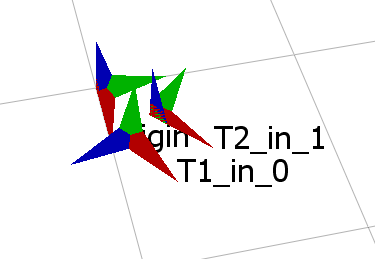

## Homework Problems

Work the following problems from the Spong Robotics Textbook which are included on the following pages. For any problem where distances are not included, please use $a$, $d$, and $\theta$ appropriately to define the DH parameters.

### 2-37

Consider the diagram of Figure 1. A robot is set up 1 meter from a table. The table top is 1 meter high and 1 meter square. A frame $o_1$ is fixed to the edge of the table as shown. A cube measuring 20 cm on a side is placed in the center of the table with frame $o_2$ established at the center of the cube as shown. A camera is situated directly above the center of the block 2 m above the table top with frame $o_3$ attached as shown. Find the homogeneous transformations relating each of these frames to the base frame $o_0$. Find the homogeneous transformation relating the frame $o_2$ to the camera frame $o_3$.

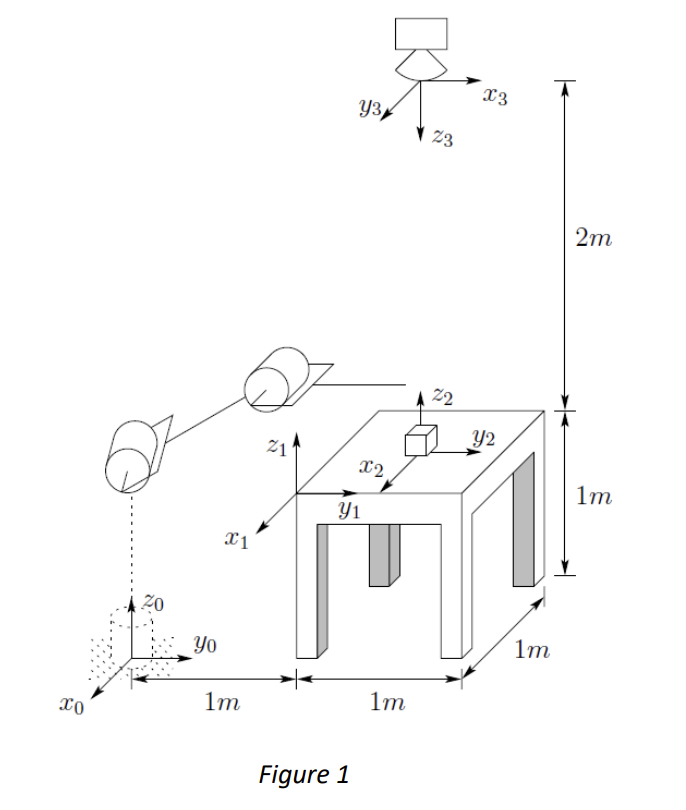

In [6]:
# Define origin coordinate system

T1_in_0 = tr.se3(np.eye(3), [0, 1, 1])
print('T1_in_0: \n' + str(T1_in_0))

T2_in_0 = tr.se3(np.eye(3), [-0.5, 1.5, 1.1])
print('\nT2_in_0: \n' + str(T2_in_0))

T3_in_2 = tr.se3(tr.rotz(np.pi/2), [0, 0, 1.9]) @ tr.se3(tr.rotx(np.pi), [0, 0, 0])
T3_in_2 = np.matrix.round(T3_in_2, decimals=2)
print('\nT3_in_2: \n' + str(T3_in_2))

T3_in_0 = T2_in_0 @ T3_in_2
T3_in_0 = np.matrix.round(T3_in_0, decimals=2)
print('\nT3_in_0: \n' + str(T3_in_0))

T1_in_0: 
[[1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]

T2_in_0: 
[[ 1.   0.   0.  -0.5]
 [ 0.   1.   0.   1.5]
 [ 0.   0.   1.   1.1]
 [ 0.   0.   0.   1. ]]

T3_in_2: 
[[ 0.   1.   0.   0. ]
 [ 1.  -0.  -0.   0. ]
 [ 0.   0.  -1.   1.9]
 [ 0.   0.   0.   1. ]]

T3_in_0: 
[[ 0.   1.   0.  -0.5]
 [ 1.   0.   0.   1.5]
 [ 0.   0.  -1.   3. ]
 [ 0.   0.   0.   1. ]]


### 2-38

In Problem 2-37, suppose that, after the camera is calibrated, it is rotated 90 degrees about $z_3$. Recompute transformations for $o_0$ to $o_3$ and $o_2$ to $o_3$.

In [7]:
T3_in_2_new = tr.se3(tr.rotz(np.pi/2), [0, 0, 1.9]) @\
              tr.se3(tr.rotx(np.pi), [0, 0, 0]) @\
              tr.se3(tr.rotz(np.pi/2), [0, 0, 0])

T3_in_2_new = np.matrix.round(T3_in_2_new, decimals=2)
print('New T3_in_2: \n' + str(T3_in_2_new))

T3_in_0_new = T3_in_0 @ tr.se3(tr.rotz(np.pi/2), [0, 0, 0])
T3_in_0_new = np.matrix.round(T3_in_0_new, decimals=2)
print('\nNew T3_in_0: \n' + str(T3_in_0_new))

New T3_in_2: 
[[ 1.   0.   0.   0. ]
 [ 0.  -1.  -0.   0. ]
 [ 0.   0.  -1.   1.9]
 [ 0.   0.   0.   1. ]]

New T3_in_0: 
[[ 1.   0.   0.  -0.5]
 [ 0.  -1.   0.   1.5]
 [ 0.   0.  -1.   3. ]
 [ 0.   0.   0.   1. ]]


### 3-4

Consider the two-link manipulator of Figure 2 which has joint 1 revolute and joint 2 prismatic. Derive the forward kinematic equations using the DH-convention.

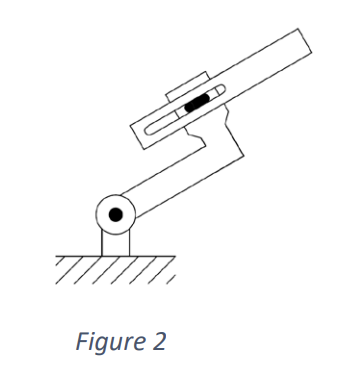

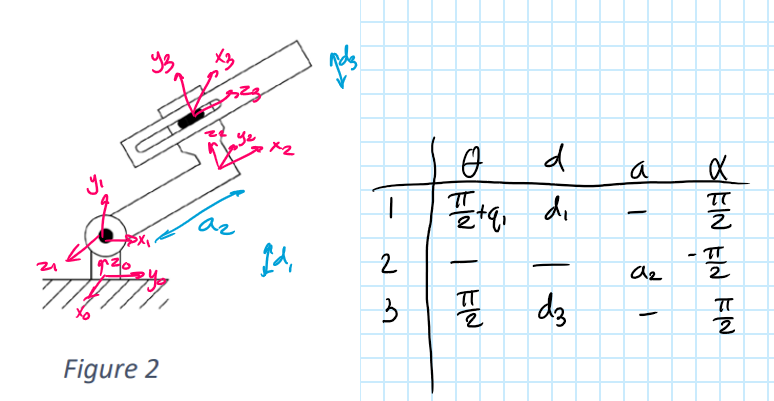

In [8]:
d1 = .5
a2 = 1
d3 = .5
# origin = np.matrix([[],
#                     [],
#                     [],
#                     [0, 0, 0, 1]])

def dh(theta, d, a, alpha):
    return tr.se3(tr.rotz(theta), [0, 0, d]) @\
           tr.se3(tr.rotx(alpha), [a, 0, 0])

def dhsym(theta, d, a, alpha):
    return st.se3(st.rotz(theta), [0, 0, d]) @\
           st.se3(st.rotx(alpha), [a, 0, 0])

T1_in_0 = dh(np.pi/2, d1, 0, np.pi/2) @ dh(np.pi/4, 0, 0, 0)
T2_in_0 = T1_in_0 @ dh(0, 0, a2, -np.pi/2)
T3_in_0 = T2_in_0 @ dh(np.pi/2, d3, 0, np.pi/2)

T3_in_0 = np.matrix.round(T3_in_0, decimals=3)

print('Transformation matrix T3_in_0:\n' + str(T3_in_0))

# Symbolic Matricies
q1, q2, q3, d1, d2, d3, a1, a2, a3 = sm.symbols(r'q_1 q_2 q_3 d_1 d_2 d_3 a_1 a_2 a_3')

T1_in_0_sym = dhsym(sm.pi/2, d1, 0, sm.pi/2) @ dhsym(q1, 0, 0, 0)
T2_in_1_sym = dhsym(0, 0, a2, -sm.pi/2)
T3_in_2_sym = dhsym(sm.pi/2, q3, 0, sm.pi/2)

display(Math(r'T_1^0 = ' + vlatex(T1_in_0_sym) +\
             r', \quad T_2^1 = ' + vlatex(T2_in_1_sym) +\
             r', \quad T_3^2 = ' + vlatex(T3_in_2_sym)))

T3_in_0_sym = T1_in_0_sym @ T2_in_1_sym @ T3_in_2_sym

display(Math(r'T_3^0 = ' + vlatex(T3_in_0_sym)))

Transformation matrix T3_in_0:
[[-1.    -0.     0.    -0.   ]
 [ 0.    -0.707  0.707  0.354]
 [ 0.     0.707  0.707  1.561]
 [ 0.     0.     0.     1.   ]]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
# Visualize coordinate systems

viz = VizScene()
viz.add_frame(np.eye(4), label='origin')
viz.add_frame(T1_in_0, label='T1_in_0')
viz.add_frame(T2_in_0, label='T2_in_0')
viz.add_frame(T3_in_0, label='T3_in_0')

viz.hold()

viz.close_viz()

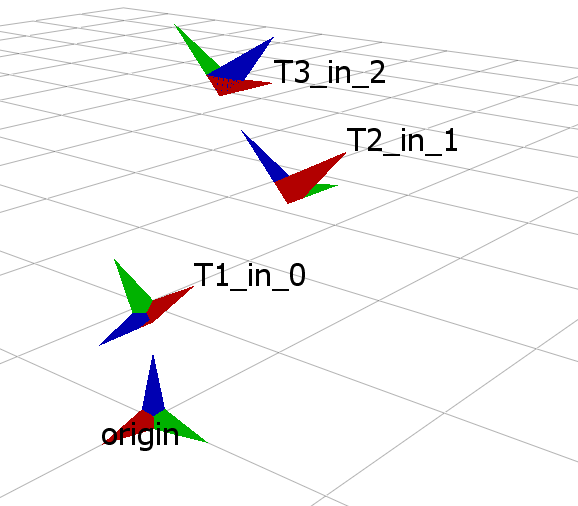

### 3-6

Consider the three-link articulated robot of Figure 3. Derive the forward kinematic equations using the DH-convention.

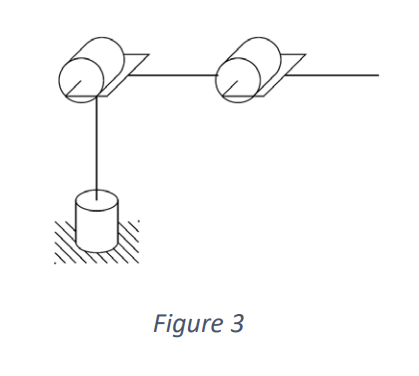

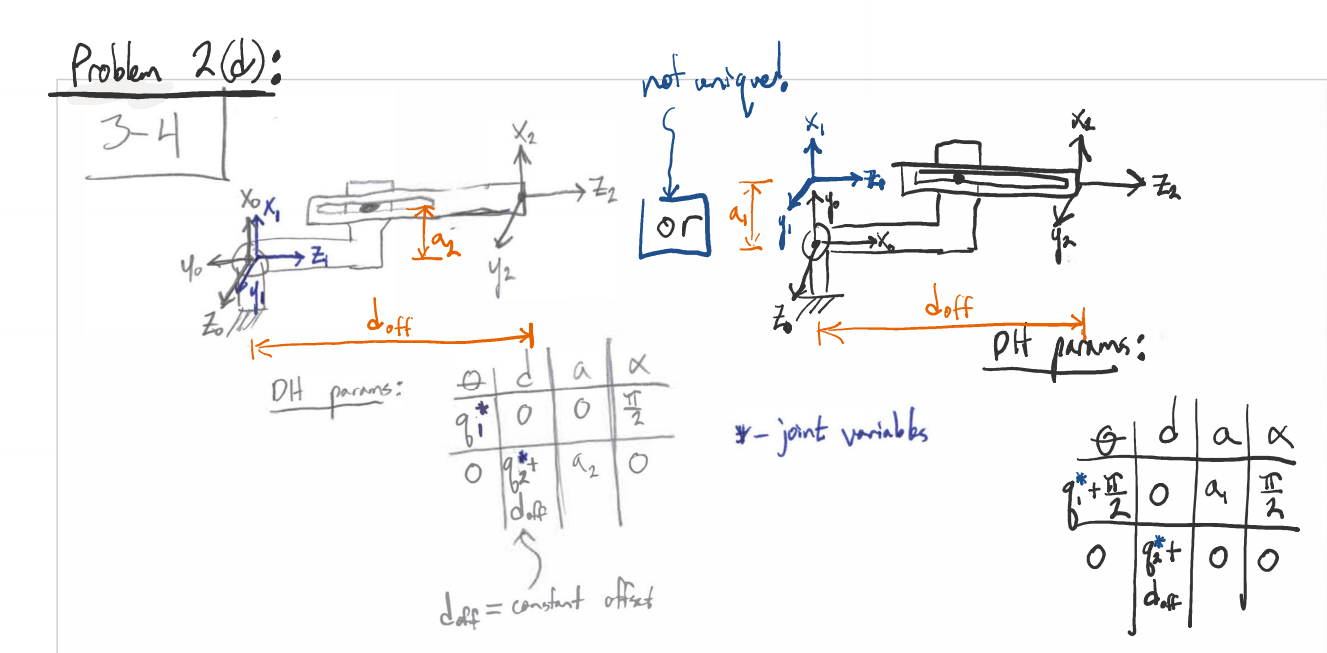

In [10]:
d1 = 1
a2 = 1
a3 = 1

T1_in_0 = dh(np.pi/2, d1, 0, np.pi/2)
T2_in_0 = T1_in_0 @ dh(0, 0, a2, 0)
T3_in_0 = T2_in_0 @ dh(0, 0, a3, 0)


T3_in_0 = np.matrix.round(T3_in_0, decimals=3)

print('Transformation matrix T3_in_0:\n' + str(T3_in_0))

Transformation matrix T3_in_0:
[[ 0. -0.  1.  0.]
 [ 1.  0. -0.  2.]
 [ 0.  1.  0.  1.]
 [ 0.  0.  0.  1.]]


In [11]:
# Symbolic matricies

q1, q2, q3, d1, d2, d3, a1, a2, a3 = sm.symbols(r'q_1 q_2 q_3 d_1 d_2 d_3 a_1 a_2 a_3')

T1_in_0_sym = dhsym(q1 + sm.pi/2, d1, 0, sm.pi/2)
T2_in_1_sym = dhsym(q2, 0, a2, 0)
T3_in_2_sym = dhsym(0, 0, a3, 0)

display(Math(r'T_1^0 = ' + vlatex(T1_in_0_sym) +\
             r', \quad T_2^1 = ' + vlatex(T2_in_1_sym) +\
             r', \quad T_3^2 = ' + vlatex(T3_in_2_sym)))

T3_in_0_sym = T1_in_0_sym @ T2_in_1_sym @ T3_in_2_sym

display(Math(r'T_3^0 = ' + vlatex(T3_in_0_sym)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
# Visualize coordinate systems

viz = VizScene()
viz.add_frame(np.eye(4), label='origin')
viz.add_frame(T1_in_0, label='T1_in_0')
viz.add_frame(T2_in_0, label='T2_in_0')
viz.add_frame(T3_in_0, label='T3_in_0')

viz.hold()

viz.close_viz()

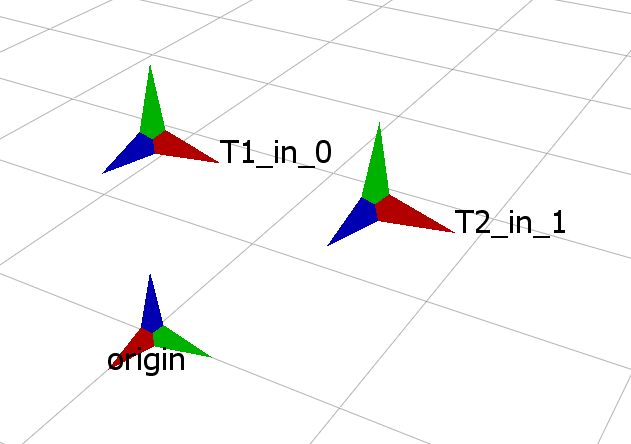

### 3-8

If we attach a spherical wrist to the three-link articulated manipulator of Problem 3-6. as shown in Figure 4. Derive the forward kinematic equations for this manipulator using the DH-convention.

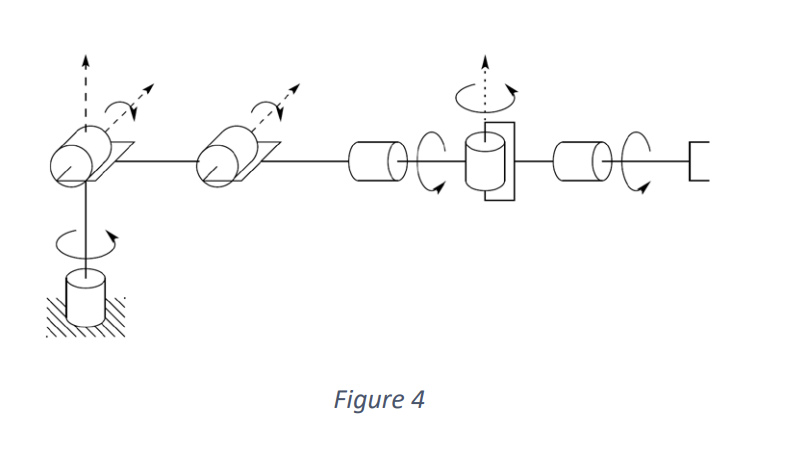

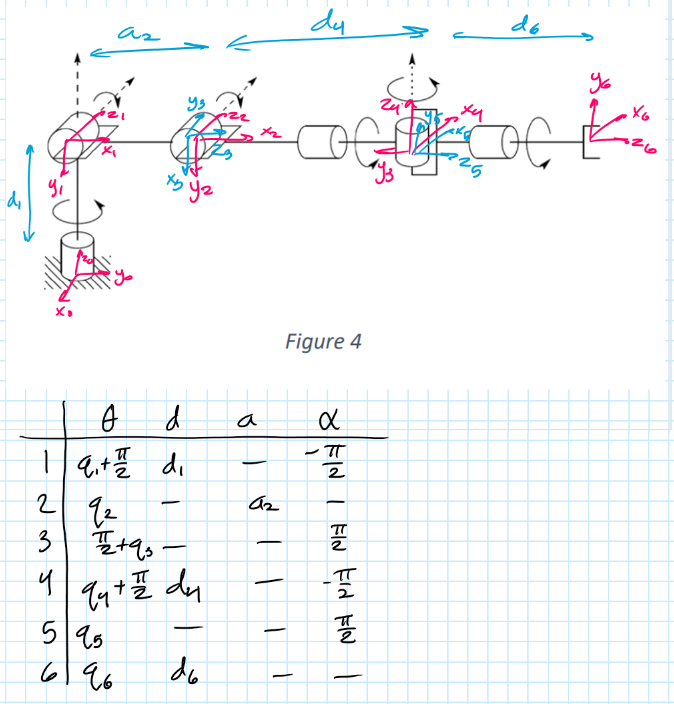

In [13]:
d1, a2, d4, d6 = 1, 1, 1, 1

T1_in_0 = dh(np.pi/2, d1, 0, -np.pi/2)
T2_in_0 = T1_in_0 @ dh(0, 0, a2, 0)
T3_in_0 = T2_in_0 @ dh(np.pi/2, 0, 0, np.pi/2)
T4_in_0 = T3_in_0 @ dh(np.pi/2, d4, 0, -np.pi/2)
T5_in_0 = T4_in_0 @ dh(0, 0, 0, np.pi/2)
T6_in_0 = T5_in_0 @ dh(0, d6, 0, 0)

T6_in_0 = np.matrix.round(T6_in_0, decimals=3)

print('Transformation matrix T6_in_0:\n' + str(T6_in_0))

Transformation matrix T6_in_0:
[[-1.  0.  0.  0.]
 [ 0. -0.  1.  3.]
 [ 0.  1.  0.  1.]
 [ 0.  0.  0.  1.]]


In [14]:
# Symbolic solution

q1, q2, q3, q4, q5, q6 = sm.symbols(r'q_1 q_2 q_3 q_4 q_5 q_6', real=True)
d1, d4, d6 = sm.symbols(r'd_1 d_4 d_6', real=True)
a2 = sm.symbols(r'a_2', real=True)

T1_in_0_sym = dhsym(q1 + sm.pi/2, d1, 0, -sm.pi/2)
T2_in_1_sym = dhsym(q2, 0, a2, 0)
T3_in_2_sym = dhsym(q3 + sm.pi/2, 0, 0, sm.pi/2)
T4_in_3_sym = dhsym(q4 + sm.pi/2, d4, 0, -sm.pi/2)
T5_in_4_sym = dhsym(q5, 0, 0, sm.pi/2)
T6_in_5_sym = dhsym(q6, d6, 0, 0)

display(Math(r'T_1^0 = ' + vlatex(T1_in_0_sym) +\
             r', \quad T_2^1 = ' + vlatex(T2_in_1_sym) +\
             r', \quad T_3^2 = ' + vlatex(T3_in_2_sym)))
display(Math(r'T_4^3 = ' + vlatex(T4_in_3_sym) +\
             r', \quad T_5^4 = ' + vlatex(T5_in_4_sym) +\
             r', \quad T_6^5 = ' + vlatex(T6_in_5_sym)))

T3_in_0_sym = T1_in_0_sym @ T2_in_1_sym @ T3_in_2_sym

display(Math(r'T_3^0 = ' + vlatex(T3_in_0_sym)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
# Visualize coordinate systems

viz = VizScene()
viz.add_frame(np.eye(4), label='origin')
viz.add_frame(T1_in_0, label='T1_in_0')
viz.add_frame(T2_in_0, label='T2_in_0')
viz.add_frame(T3_in_0, label='T3_in_0')
viz.add_frame(T4_in_0, label='T4_in_0')
viz.add_frame(T5_in_0, label='T5_in_0')
viz.add_frame(T6_in_0, label='T6_in_0')

viz.hold()

viz.close_viz()

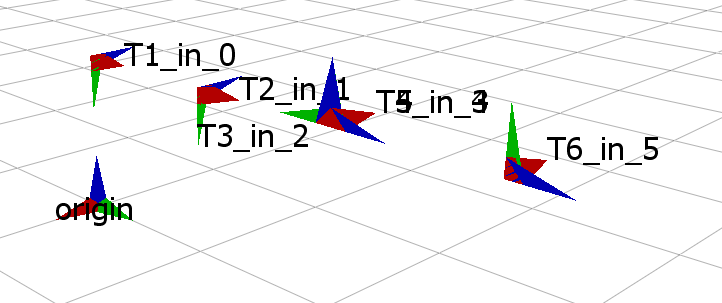